In [1]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.parse.generate import generate

In [2]:
sentence = 'The little mouse ate the fresh white cheese kept on the big bed.'

In [3]:
# Word Tokenization and POS tag
tokens = pos_tag(word_tokenize(sentence))
tokens

[('The', 'DT'),
 ('little', 'JJ'),
 ('mouse', 'NN'),
 ('ate', 'VB'),
 ('the', 'DT'),
 ('fresh', 'JJ'),
 ('white', 'JJ'),
 ('cheese', 'NN'),
 ('kept', 'VBD'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('big', 'JJ'),
 ('bed', 'NN'),
 ('.', '.')]

In [4]:
# Zero or One(?) Determiner followed by zero or more(*) Adjective followed by a Noun
grammar = r"NP : {<DT>?<JJ>*<NN>}"
parser = nltk.RegexpParser(grammar)

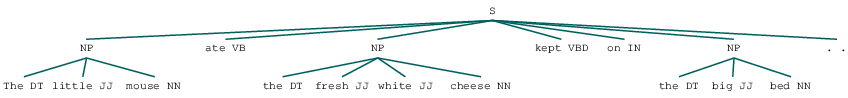

In [5]:
parser.parse(tokens)

In [48]:
[[' '.join(leaf[0] for leaf in tree.leaves())] for tree in parser.parse(tokens).subtrees() if tree.label()=='NP']

[['The little mouse'], ['the fresh white cheese'], ['the big bed']]

In [21]:
chink_grammar = r'''NP: {<DT>?<JJ>*<NN>}
                    }<NN>{'''

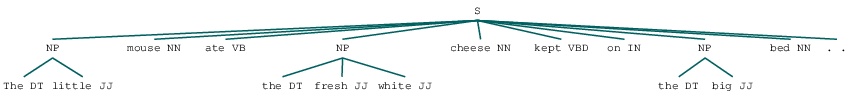

In [22]:
chink_parser = nltk.RegexpParser(chink_grammar)
chink_parser.parse(tokens)

[['The little mouse'], ['the fresh white cheese'], ['the big bed']]

In [31]:
CFG_grammar = nltk.CFG.fromstring('''
S -> NP VP
VP -> V "the" N
V ->"loves"|"hates"|"admires"
NP ->"Rahil"|"Mahesh"|"Amruta"|"Narayan"
N ->"dog"|"cat"|"horse"''')

In [32]:
for sentence in generate(CFG_grammar):
    print(" ".join(sentence))

Rahil loves the dog
Rahil loves the cat
Rahil loves the horse
Rahil hates the dog
Rahil hates the cat
Rahil hates the horse
Rahil admires the dog
Rahil admires the cat
Rahil admires the horse
Mahesh loves the dog
Mahesh loves the cat
Mahesh loves the horse
Mahesh hates the dog
Mahesh hates the cat
Mahesh hates the horse
Mahesh admires the dog
Mahesh admires the cat
Mahesh admires the horse
Amruta loves the dog
Amruta loves the cat
Amruta loves the horse
Amruta hates the dog
Amruta hates the cat
Amruta hates the horse
Amruta admires the dog
Amruta admires the cat
Amruta admires the horse
Narayan loves the dog
Narayan loves the cat
Narayan loves the horse
Narayan hates the dog
Narayan hates the cat
Narayan hates the horse
Narayan admires the dog
Narayan admires the cat
Narayan admires the horse
